In [2]:
import datetime as dt
from datetime import date
from datetime import datetime

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
import pandas as pd

In [69]:
from sklearn.preprocessing import StandardScaler

In [5]:
online = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")

In [6]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Time Cohort Table

### Create the InvoiceMonth and the Cohort Month

In [7]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, 1)  # using 1 to specify the monthly data 

# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortMonth'] = grouping.transform('min')




In [8]:
# View the top 5 rows
online.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
442457,574673,21703,BAG 125g SWIRLY MARBLES,8,2011-11-06 12:26:00,0.42,15555.0,United Kingdom,2011-11-01,2010-12-01
259780,559711,84997A,CHILDRENS CUTLERY POLKADOT GREEN,4,2011-07-12 10:46:00,4.15,13590.0,United Kingdom,2011-07-01,2011-02-01
279687,561359,23203,JUMBO BAG DOILEY PATTERNS,10,2011-07-26 15:29:00,2.08,17160.0,United Kingdom,2011-07-01,2011-04-01
315631,564733,22893,MINI CAKE STAND T-LIGHT HOLDER,10,2011-08-28 13:18:00,0.42,17841.0,United Kingdom,2011-08-01,2010-12-01
387327,C570283,22962,JAM JAR WITH PINK LID,-3,2011-10-10 11:20:00,0.85,12708.0,Germany,2011-10-01,2010-12-01
68348,541862,22722,SET OF 6 SPICE TINS PANTRY DESIGN,2,2011-01-23 16:02:00,3.95,14068.0,United Kingdom,2011-01-01,2011-01-01
334886,566271,23154,SET OF 4 JAM JAR MAGNETS,12,2011-09-11 13:44:00,2.08,14250.0,United Kingdom,2011-09-01,2011-09-01
300246,563194,85066,CREAM SWEETHEART MINI CHEST,2,2011-08-12 16:36:00,12.75,17858.0,United Kingdom,2011-08-01,2010-12-01
67401,541830,22613,PACK OF 20 SPACEBOY NAPKINS,2,2011-01-21 17:09:00,1.63,NaN,United Kingdom,2011-01-01,NaT
188959,553074,20981,12 PENCILS TALL TUBE WOODLAND,2,2011-05-13 11:45:00,0.85,15529.0,United Kingdom,2011-05-01,2010-12-01


In [9]:
# Define a function to extract the year month and day of the specific column
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [10]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceMonth')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortMonth')

In [11]:
invoice_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceMonth, Length: 541909, dtype: int64

In [12]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff + 1


Cohort index is the 

In [13]:
online.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
65486,541695,85049H,URBAN BLACK RIBBONS,12,2011-01-20 18:01:00,0.83,NaN,United Kingdom,2011-01-01,NaT,NaN
231732,557278,15036,ASSORTED COLOURS SILK FAN,12,2011-06-19 12:08:00,0.83,13089.0,United Kingdom,2011-06-01,2010-12-01,7.0
477989,577078,23309,SET OF 60 I LOVE LONDON CAKE CASES,1,2011-11-17 15:17:00,1.25,NaN,United Kingdom,2011-11-01,NaT,NaN
409294,572055,23079,TOADSTOOL BEDSIDE LIGHT,1,2011-10-20 12:34:00,8.95,17346.0,United Kingdom,2011-10-01,2010-12-01,11.0
313359,C564486,S,SAMPLES,-1,2011-08-25 13:57:00,162.00,NaN,United Kingdom,2011-08-01,NaT,NaN
497352,578364,23188,VINTAGE 2 METRE FOLDING RULER,12,2011-11-24 10:42:00,1.65,13588.0,United Kingdom,2011-11-01,2011-03-01,9.0
144252,548733,22427,ENAMEL FLOWER JUG CREAM,3,2011-04-04 10:29:00,5.95,17648.0,United Kingdom,2011-04-01,2011-04-01,1.0
137739,548166,22412,METAL SIGN NEIGHBOURHOOD WITCH,1,2011-03-29 13:45:00,4.13,NaN,United Kingdom,2011-03-01,NaT,NaN
491667,578072,23320,GIANT 50'S CHRISTMAS CRACKER,2,2011-11-22 16:02:00,2.89,17759.0,United Kingdom,2011-11-01,2011-06-01,6.0
40440,539737,22311,OFFICE MUG WARMER BLACK+SILVER,2,2010-12-21 15:19:00,8.47,NaN,United Kingdom,2010-12-01,NaT,NaN


In [14]:
online.dropna().shape

(406829, 11)

In [15]:
online.shape

(541909, 11)

In [16]:
online = online.dropna()

In [17]:
online.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
37403,539464,22963,JAM JAR WITH GREEN LID,3,2010-12-19 11:35:00,0.850,17913.0,United Kingdom,2010-12-01,2010-12-01,1.0
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,2011-09-01,2011-01-01,9.0
349735,567526,23342,MINT DINER WALL CLOCK,36,2011-09-21 09:06:00,7.650,12435.0,Denmark,2011-09-01,2011-03-01,7.0
440053,574502,22963,JAM JAR WITH GREEN LID,1,2011-11-04 13:16:00,0.850,17274.0,United Kingdom,2011-11-01,2011-11-01,1.0
199801,554103,21931,JUMBO STORAGE BAG SUKI,1,2011-05-22 13:51:00,2.080,15555.0,United Kingdom,2011-05-01,2010-12-01,6.0
302126,563376,22557,PLASTERS IN TIN VINTAGE PAISLEY,2,2011-08-16 10:36:00,1.650,15752.0,United Kingdom,2011-08-01,2010-12-01,9.0
189275,553146,22061,LARGE CAKE STAND HANGING STRAWBERY,2,2011-05-13 13:52:00,9.950,14873.0,United Kingdom,2011-05-01,2011-05-01,1.0
313257,564479,85099B,JUMBO BAG RED RETROSPOT,10,2011-08-25 13:12:00,2.080,12682.0,France,2011-08-01,2010-12-01,9.0
333261,566190,84536B,FAIRY CAKES NOTEBOOK A7 SIZE,10,2011-09-09 13:20:00,0.420,12748.0,United Kingdom,2011-09-01,2010-12-01,10.0
349332,567488,23014,GLASS APOTHECARY BOTTLE ELIXIR,1,2011-09-20 14:00:00,3.950,17564.0,United Kingdom,2011-09-01,2011-09-01,1.0


In [18]:
grouping = online.groupby(['CohortMonth','CohortIndex'] )

In [19]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)  # Get the number of unique customer in the data

In [20]:
cohort_data.head()  
# the number of unique customers the company get groupby the cohortday and the active duration(CohortIndex)

CohortMonth  CohortIndex
2010-12-01   1.0            948
             2.0            362
             3.0            317
             4.0            367
             5.0            341
Name: CustomerID, dtype: int64

In [21]:
cohort_data = cohort_data.reset_index()

In [22]:
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1.0,948
1,2010-12-01,2.0,362
2,2010-12-01,3.0,317
3,2010-12-01,4.0,367
4,2010-12-01,5.0,341


In [23]:
cohort_count = cohort_data.pivot(index = 'CohortMonth',
                                columns = 'CohortIndex',
                                values = 'CustomerID')

In [24]:
cohort_count

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_count.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_count.divide(cohort_sizes, axis=0)

In [26]:
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
 retention.round(3)*100


CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


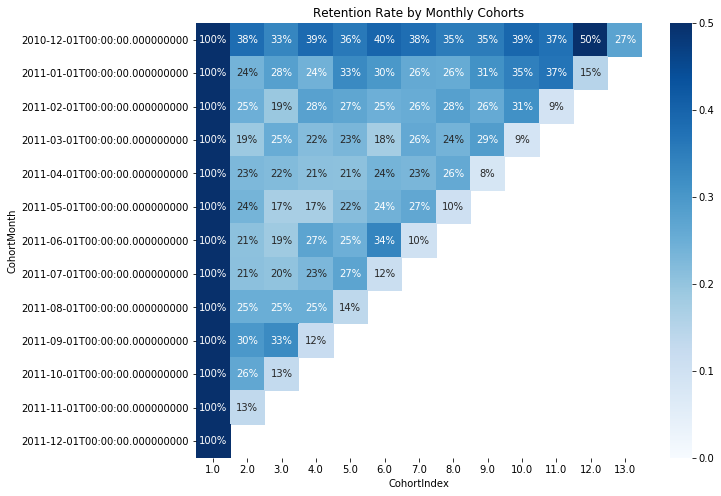

In [28]:
# Import seaborn package as sns

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(10, 8))

# Add a title
plt.title('Retention Rate by Monthly Cohorts')

# Create the heatmap
sns.heatmap(retention, annot=True, vmax=0.50, vmin= 0.0, fmt = '.0%', cmap='Blues')
plt.show()

### Create the average price metrix 


In [29]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex'])  
# Always group by 'CohortMonth'(starting time), 'CohortIndex'(unit during)

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')

In [30]:
average_price.head()

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.205109,3.183116,3.203559,3.587192,2.931327,4.969632,3.180149,3.222388,3.504112,3.033842,3.298406,2.826403,2.758445
2011-01-01,3.496222,3.650142,3.061950,8.366407,3.156226,3.161185,2.911392,2.745126,2.641303,5.452754,2.874456,2.603719,NaN
2011-02-01,3.343196,4.449731,4.796154,3.147080,2.987471,2.788575,2.808957,3.209261,2.890596,2.938377,3.217126,NaN,NaN
2011-03-01,3.292194,4.975156,3.662518,3.280997,3.609860,2.760767,2.838699,2.794577,2.697759,2.486305,NaN,NaN,NaN
2011-04-01,3.422758,3.960941,3.305169,2.677791,3.017785,2.860244,2.890191,2.800054,2.613616,NaN,NaN,NaN,NaN


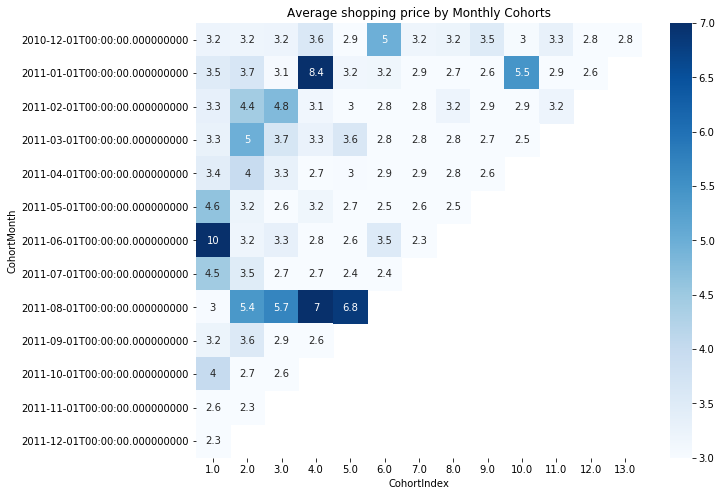

In [31]:
plt.figure(figsize=(10, 8))

# Add a title
plt.title('Average shopping price by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_price, vmax=7, vmin= 3,annot=True, cmap='Blues')
plt.show()

### Create the average quantity metrix 


In [32]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex'])  
# Always group by 'CohortMonth'(starting time), 'CohortIndex'(unit during)

# Calculate the average of the unit price column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

In [33]:
average_quantity

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.037691,14.603253,14.982141,14.801090,12.943024,14.318095,15.173387,14.759559,16.660455,16.691004,17.264954,12.823263,14.776623
2011-01-01,10.015502,12.573579,12.343099,10.940531,12.234048,14.895373,14.226042,14.385729,11.398390,9.883069,9.090436,9.541612,NaN
2011-02-01,10.830223,12.081317,18.563242,11.959050,11.117223,11.411479,13.346939,12.381845,10.272146,11.945771,12.645977,NaN,NaN
2011-03-01,9.762443,9.924222,12.207366,9.455425,13.579228,12.313412,13.162317,12.177130,10.517494,8.880203,NaN,NaN,NaN
2011-04-01,9.753962,10.105226,9.420617,11.598922,11.488889,8.220785,9.680620,9.289391,7.290019,NaN,NaN,NaN,NaN
2011-05-01,10.866930,9.030276,13.884270,11.805435,10.900268,8.668230,10.148510,7.371571,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.327849,13.681576,10.463847,13.275611,10.232734,9.758786,9.255627,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.722333,12.700952,7.142646,7.844268,6.013594,7.013233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.890294,5.958955,5.345404,5.976259,6.980110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


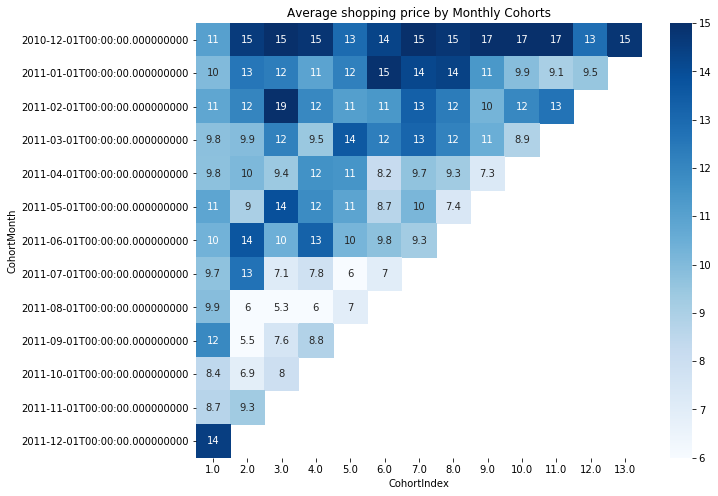

In [34]:
plt.figure(figsize=(10, 8))

# Add a title
plt.title('Average shopping price by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_quantity, vmax=15, vmin= 6,annot=True, cmap='Blues')
plt.show()

# Recency, Frequency, Monetary (RFM) segmentation
- group customers based on these known parameters.


In [35]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


### Create RFM column of the data

In [36]:
# First create total_spend column
online['TotalSpend']=online['Quantity'] * online['UnitPrice']

In [37]:
today = pd.Timestamp('2011-12-12 00:00:00')  #Create a timestamp of current date

In [38]:
# Calculate Recency, Frequency and Monetary value for each customer 
#apply the different function to specific column using agg(dictionary)

datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (today- x.max()).days,
    'InvoiceNo': 'count',
    'TotalSpend': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSpend': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,327,2,0.00
12347.0,4,182,4310.00
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40


In [52]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4);m_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Create new columns R and F 
datamart = datamart.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

In [40]:
# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
print(datamart['RFM_Score'].head())

CustomerID
12346.0    3.0
12347.0    9.0
12348.0    7.0
12349.0    8.0
12350.0    3.0
Name: RFM_Score, dtype: float64


In [41]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,327,2,0.00,1,1,1,3.0
12347.0,4,182,4310.00,3,3,3,9.0
12348.0,77,31,1797.24,2,2,3,7.0
12349.0,20,73,1757.55,3,2,3,8.0
12350.0,312,17,334.40,1,1,1,3.0
...,...,...,...,...,...,...,...
18280.0,279,10,180.60,1,1,1,3.0
18281.0,182,7,80.82,1,1,1,3.0
18282.0,9,13,176.60,3,1,1,5.0


### Analyze RFM Segment
- Segament the customer into three group: Top Medium Low based on the RFM Score

In [53]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 8:
        return 'Top'
    
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 8)):
        return 'Middle'
    else:
        return 'Low'


In [54]:
# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)


In [55]:
datamart.head(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12346.0,327,2,0.00,1,1,1,3.0,Low
12347.0,4,182,4310.00,3,3,3,9.0,Top
12348.0,77,31,1797.24,2,2,3,7.0,Middle
12349.0,20,73,1757.55,3,2,3,8.0,Top
12350.0,312,17,334.40,1,1,1,3.0,Low
12352.0,38,95,1545.41,2,3,3,8.0,Top
12353.0,206,4,89.00,1,1,1,3.0,Low
12354.0,234,58,1079.40,1,2,2,5.0,Middle
12355.0,216,13,459.40,1,1,2,4.0,Low


### Explore the pattern of different RFM_Level

In [56]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)


In [57]:
# Print the aggregated dataset
rfm_level_agg.head(10)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         192.6      14.8         230.1  1248
Middle       76.7      49.8         862.0  1844
Top          21.4     231.7        5018.2  1280

## Use K mean cluster to cluster the customers based on the RFM

prerequisites of K mean cluster:
- The distribution of the data should be a normal distribution


- The mean of the variables should be same -----centered data (data - data.mean())
- The variance of the variables should be same -----scaled data (data - daya.sdt())
- data_normalized = ( data - data.mean()) / data.std()



In [124]:
datamart_rfm = datamart.drop(['R','F','M','RFM_Score','RFM_Level'], axis = 1)

In [127]:
datamart_rfm = datamart_rfm[datamart_rfm.MonetaryValue > 0]   
datamart_rfm = datamart_rfm[datamart_rfm.Recency > 0]   
datamart_rfm = datamart_rfm[datamart_rfm.Frequency > 0]   
datamart_rfm = datamart_rfm.dropna()
# delete row with zero value in case of having mistake when do the log transformation

In [128]:
datamart_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,4,182,4310.00
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40
12352.0,38,95,1545.41
...,...,...,...
18280.0,279,10,180.60
18281.0,182,7,80.82
18282.0,9,13,176.60


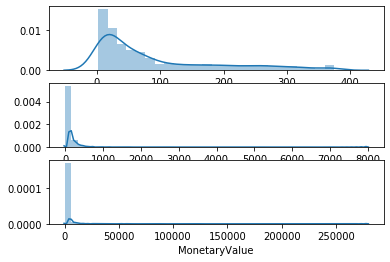

In [129]:
# Check out the distribution of the RFM
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

In [182]:
len(datamart_normalized[datamart_normalized['MonetaryValue']==0])


0

In [130]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

In [131]:
datamart_normalized

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,-1.825740,1.134184,1.034122
12348.0,0.400757,-0.213153,0.543100
12349.0,-0.614110,0.438793,0.530564
12350.0,1.454112,-0.670461,-0.400938
12352.0,-0.130905,0.639306,0.458354
...,...,...,...
18280.0,1.369953,-1.074374,-0.746771
18281.0,1.048341,-1.345875,-1.198146
18282.0,-1.215249,-0.874663,-0.759345


In [132]:

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

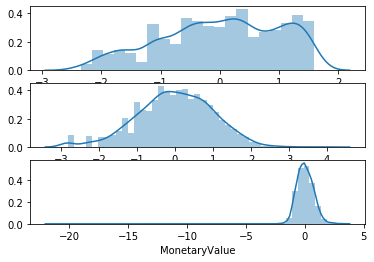

In [133]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

### Fit the model using K mean clustering

- Select the best number of K
- Find the elbow point and select the number of cluster

In [139]:
# Fit KMeans and calculate SSE for each k
sse = {}
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ 

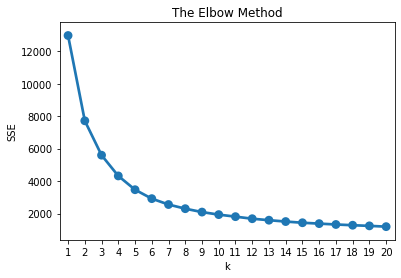

In [140]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

#### Fit the model using n_cluster = 2 because 2 is the elbow point

In [186]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels_k2 = kmeans.labels_

In [187]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k2 = datamart_rfm.assign(Cluster=cluster_labels_k2)

# Group the data by cluster
grouped = datamart_rfm_k2.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          27.5     174.4        3616.2  1988
1         146.7      25.7         481.7  2334

In [188]:
datamart_rfm_k2.head()


,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,4,182,4310.00,0
12348.0,77,31,1797.24,1
12349.0,20,73,1757.55,0
12350.0,312,17,334.40,1
12352.0,38,95,1545.41,0


- Normalize the clustered dataset with k =2and3

In [189]:
rfm_k2_norm = datamart_normalized.assign(Cluster=cluster_labels_k2)


In [190]:
rfm_k2_norm.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,-1.825740,1.134184,1.034122,0
12348.0,0.400757,-0.213153,0.543100,1
12349.0,-0.614110,0.438793,0.530564,0
12350.0,1.454112,-0.670461,-0.400938,1
12352.0,-0.130905,0.639306,0.458354,0


#### Reconstruct the clustered dataset with k =3 using melt()

In [191]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(rfm_k2_norm.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'],   #将三列一列
                        
# Name the variable and value
                    var_name='Metric', value_name='Value')  #将三列的value变成一列的value对应上一列

In [192]:
datamart_melt

,CustomerID,Cluster,Metric,Value
0,12347.0,0,Recency,-1.825740
1,12348.0,1,Recency,0.400757
2,12349.0,0,Recency,-0.614110
3,12350.0,1,Recency,1.454112
4,12352.0,0,Recency,-0.130905
...,...,...,...,...
12961,18280.0,1,MonetaryValue,-0.746771
12962,18281.0,1,MonetaryValue,-1.198146
12963,18282.0,1,MonetaryValue,-0.759345
12964,18283.0,0,MonetaryValue,0.629127


#### Plot the snake plot (sns.lineplot) to track the different customer behavior of the different cluster

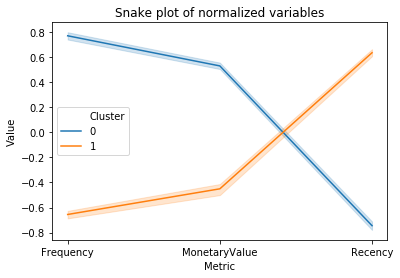

In [193]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

#### Calculate relative importance of each attribute

In [195]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k2.groupby(['Cluster']).mean() 

cluster_avg

,Recency,Frequency,MonetaryValue
Cluster,,,
0,27.539235,174.353622,3616.210268
1,146.681234,25.664524,481.691920


In [196]:
# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()
population_avg

Recency            91.879223
Frequency          94.057381
MonetaryValue    1923.483330
dtype: float64

In [197]:

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0           -0.7       0.85           0.88
1            0.6      -0.73          -0.75


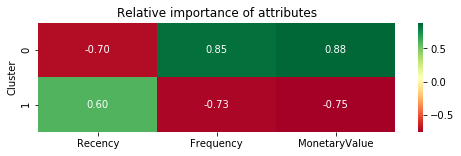

In [198]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()